

# Project: Soccer Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 
This analysis will answer the questions about the soccer dataset like 
* What teams improved the most over the time period?  
* Which players had the most penalties? 
* What team attributes lead to the most victories?

To begin with, let's check up the data set in each table first.



In [234]:
# set up import statements for all of the packages 
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

In [2]:
# Loading Data
database = 'database.sqlite'
conn = sqlite3.connect(database)
tables = pd.read_sql("SELECT * FROM sqlite_master WHERE type='table'", conn)

In [3]:
tables.head(8)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [4]:
player_table = pd.read_sql_query("SELECT * FROM Player", conn)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)
match_table = pd.read_sql_query("SELECT * FROM Match", conn)
league_table = pd.read_sql_query("SELECT * FROM League", conn)
country_table = pd.read_sql_query("SELECT * FROM Country", conn)
team_table = pd.read_sql_query("SELECT * FROM Team", conn)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", conn)

<a id='wrangling'></a>
## Data Wrangling

> Check up the general property of all tables by using pandas to check the dimension, datatype, basic descriptive statistics and numbers of null data , then do some adjustment for better analysis (ex. join different tables, fill some numbers in the null data or simply drop them, filter only the important columns...ect)

> We have 7 tables as following:
- player_table 
- player_att_table
- match_table 
- league_table 
- country_table 
- team_table 
- team_att_table

### General Properties

#### Player table 

In [411]:
# player_table
print("Dimension of Country Table is: {}".format(player_table.shape))
print(100*"*")
print(player_table.info())
print(100*"*")
print(player_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_table.describe())
print(100*"*")
print(player_table.isnull().sum(axis=0))
print(100*"*")

Dimension of Country Table is: (11060, 7)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB
None
****************************************************************************************************
       player_name             birthday
count        11060                11060
unique       10848                 5762
top         Danilo  1989-03-02 00:00:00
freq             7                   10
**************************************************************************

In [5]:
# check the first 10 line of player_table 
player_table.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


#### Player attribute table 

In [323]:
# player_att_table
print("Dimension of Country Table is: {}".format(player_att_table.shape))
print(100*"*")
print(player_att_table.info())
print(100*"*")
print(player_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(player_att_table.describe())
print(100*"*")
print(player_att_table.isnull().sum(axis=0))

Dimension of Country Table is: (183978, 42)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
fr

In [324]:
# check the first 10 lines of player_att_table
player_att_table.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


#### Match table 

In [415]:
# match_table
print("Dimension of Country Table is: {}".format(match_table.shape))
print(100*"*")
print(match_table.info())
print(100*"*")
print(match_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(match_table.describe())
print(100*"*")
print(match_table.isnull().sum(axis=0))

Dimension of Country Table is: (25979, 115)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
****************************************************************************************************
           season                 date      goal      shoton      shotoff  \
count       25979                25979     14217       14217        14217   
unique          8                 1694     13225        8464         8464   
top     2008/2009  2009-04-11 00:00:00  <goal />  <shoton />  <shotoff />   
freq         3326                   60       993        5754         5754   

            foulcommit      card      cross      corner      possession  
count            14217     14217      14217       14217           14217  
unique            8466     13777       846

In [643]:
# check the first 10 lines of match_table
match_table.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


#### League table 

In [417]:
# league_table
print("Dimension of Country Table is: {}".format(league_table.shape))
print(100*"*")
print(league_table.info())
print(100*"*")
print(league_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(league_table.describe())
print(100*"*")
print(league_table.isnull().sum(axis=0))

Dimension of Country Table is: (11, 3)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
None
****************************************************************************************************
                          name
count                       11
unique                      11
top     England Premier League
freq                         1
****************************************************************************************************
                 id    country_id
count     11.000000     11.000000
mean   12452.090909  12452.090909
std     8215.308472   8215.308472
min        1.000000      1.000000
25%     6289.000000   6289.000000
50%    13274.000000  13274.000000
75%   

In [418]:
# check the league_table
league_table.head(11)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


#### Country table 

In [419]:
# country_table
print("Dimension of Country Table is: {}".format(country_table.shape))
print(100*"*")
print(country_table.info())
print(100*"*")
print(country_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(country_table.describe())
print(100*"*")
print(country_table.isnull().sum(axis=0))

Dimension of Country Table is: (11, 2)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
****************************************************************************************************
            name
count         11
unique        11
top     Scotland
freq           1
****************************************************************************************************
                 id
count     11.000000
mean   12452.090909
std     8215.308472
min        1.000000
25%     6289.000000
50%    13274.000000
75%    18668.000000
max    24558.000000
****************************************************************************************************
id      0
name    0
dtype: int64


In [420]:
# check the country_table
country_table.head(11)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


#### Team table 

In [421]:
# team_table
print("Dimension of Country Table is: {}".format(team_table.shape))
print(100*"*")
print(team_table.info())
print(100*"*")
print(team_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_table.describe())
print(100*"*")
print(team_table.isnull().sum(axis=0))

Dimension of Country Table is: (299, 5)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
None
****************************************************************************************************
              team_long_name team_short_name
count                    299             299
unique                   296             259
top     Royal Excel Mouscron             POR
freq                       2               3
****************************************************************************************************
                 id    team_api_id  team_fifa_api_id
count   

In [422]:
# check the first 10 lines of team_table
team_table.head(10)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


#### Team attribute table 

In [423]:
# team_att_table
print("Dimension of Country Table is: {}".format(team_att_table.shape))
print(100*"*")
print(team_att_table.info())
print(100*"*")
print(team_att_table.select_dtypes(exclude=['float64','int64']).describe())
print(100*"*")
print(team_att_table.describe())
print(100*"*")
print(team_att_table.isnull().sum(axis=0))

Dimension of Country Table is: (1458, 25)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 no

In [17]:
# check thiie first 10 lines of team_att_table
team_att_table.head(10)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
7,8,77,8485,2014-09-19 00:00:00,58,Balanced,64.0,Normal,62,Mixed,...,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
8,9,77,8485,2015-09-10 00:00:00,59,Balanced,64.0,Normal,53,Mixed,...,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
9,10,614,8576,2010-02-22 00:00:00,60,Balanced,NaN,Little,40,Mixed,...,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


### Data Cleaning 

Cleaning team_attributes tables for question 3. since we will do correlation analysis base on only numerical data, so I will drop categorical datas as well as buildUpPlayDribbling, which is though numerical data but too many NaN included.  

In [332]:
# clean data for question 3 
# Select attr and team name 
team_att_name = pd.read_sql("""SELECT *
                        FROM Team t
                        JOIN Team_Attributes a ON t.team_api_id = a.team_api_id                  
                        ;""", conn)
team_att_name.head()


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,8485,2011-02-22 00:00:00,47,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [333]:
# change datatype of date to datetime  
team_att_name['date'] = pd.to_datetime(team_att_name['date'])

# extract only the year and rename the colunm 
team_att_name['date'] = team_att_name['date'].dt.year
team_att_name.rename(columns={"date":"year"}, inplace=True)

# 2008,2009,2016 this three years do not have team attributes data, 
# therefore I will do my analysis based on 2010-2015
team_att_name['year'].value_counts()

2015    245
2014    244
2011    244
2013    242
2012    242
2010    241
Name: year, dtype: int64

In [334]:
team_att_name.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,year,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,49119,9930,434,FC Aarau,AAR,1,434,9930,2010,60,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,49119,9930,434,FC Aarau,AAR,2,434,9930,2014,52,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,49119,9930,434,FC Aarau,AAR,3,434,9930,2015,47,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,39393,8485,77,Aberdeen,ABE,4,77,8485,2010,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,39393,8485,77,Aberdeen,ABE,5,77,8485,2011,47,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [335]:
#drop unneeded colunms : non_numeric, nan , unessencial info 
columns = ['id','team_fifa_api_id','team_api_id','buildUpPlaySpeedClass','buildUpPlayDribbling','buildUpPlayDribblingClass','buildUpPlayPassingClass','chanceCreationPassingClass','buildUpPlayPositioningClass','chanceCreationCrossingClass','chanceCreationShootingClass','chanceCreationPositioningClass','defencePressureClass','defenceAggressionClass','defenceTeamWidthClass','defenceDefenderLineClass','team_short_name']
team_att_name.drop(columns, inplace=True, axis=1)
team_att_name.head()



,team_long_name,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,FC Aarau,2010,60,50,60,65,55,50,55,45
1,FC Aarau,2014,52,56,54,63,64,47,44,54
2,FC Aarau,2015,47,54,54,63,64,47,44,54
3,Aberdeen,2010,70,70,70,70,70,60,70,70
4,Aberdeen,2011,47,52,53,48,52,47,47,52


>  Below we can see, team attributes table contains datas only range from year 2010 to year 2015. So in the question 3 we will only analyze years between 2010 and 2015 

In [336]:
#by year
#2010
team_att_name_2010 = team_att_name.query('year=="2010"')
#2011
team_att_name_2011 = team_att_name.query('year=="2011"')
#2012
team_att_name_2012 = team_att_name.query('year=="2012"')
#2013
team_att_name_2013 = team_att_name.query('year=="2013"')
#2014
team_att_name_2014 = team_att_name.query('year=="2014"')
#2015
team_att_name_2015 = team_att_name.query('year=="2015"')


<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1 - What teams improved the most over the time period?

### Definition of question : 
 Here i define the improvement of the team as the increase of its win rate between the  earlist match season      
 2008/2009 and latest 2015/2016 , so in the following i would calculate each team win rate on the basis of year
 and deduct the 2015/2016 win rate with 2008/2009 win rate to get the difference.

### Definition of win rate : 
according wikipedia, i define win rate in my analysis as "(win + draws * 0.5) / total games". 

wiki link: https://en.wikipedia.org/wiki/Winning_percentage


> To answer the question, I'll  get the corresponding team name for Home team and Away team based on the team_api_id by joining match table and Team table. Later, increase win,lose,and draw colunms to record the match result . 


In [6]:
# Select match data and join on team table 
team_match = pd.read_sql("""SELECT m.season Season ,m.date Date, t.team_long_name Home_team_name,tt.team_long_name Away_team_name,m.home_team_goal Home_team_goal
                                ,m.away_team_goal Away_team_goal
                        FROM Match m
                        JOIN Team t ON t.team_api_id = m.home_team_api_id
                        JOIN Team tt ON tt.team_api_id = m.away_team_api_id
                        ;""", conn)
team_match.head()


,Season,Date,Home_team_name,Away_team_name,Home_team_goal,Away_team_goal
25964,2015/2016,2015-08-29 00:00:00,Lugano,FC Luzern,0,1
25965,2015/2016,2015-08-29 00:00:00,FC Vaduz,FC St. Gallen,1,0
25966,2015/2016,2015-08-30 00:00:00,FC Thun,FC Sion,0,2
25967,2015/2016,2015-08-30 00:00:00,FC Basel,FC Zürich,3,1
25968,2015/2016,2015-08-30 00:00:00,Grasshopper Club Zürich,BSC Young Boys,3,2
25969,2015/2016,2015-09-12 00:00:00,FC Basel,FC St. Gallen,2,1
25970,2015/2016,2015-09-12 00:00:00,BSC Young Boys,FC Vaduz,4,0
25971,2015/2016,2015-09-13 00:00:00,FC Luzern,Grasshopper Club Zürich,3,3
25972,2015/2016,2015-09-13 00:00:00,FC Zürich,FC Thun,3,3
25973,2015/2016,2015-09-13 00:00:00,FC Sion,Lugano,3,0


In [316]:
# Total Team numbers 
print("Total Home_team Teams: ", team_match['Home_team_name'].nunique())
print("Total Away_team Teams: ", team_match['Away_team_name'].nunique())
print(100*"*")

# total match season 
print(team_match.Season.value_counts())

Total Home_team Teams:  296
Total Away_team Teams:  296
****************************************************************************************************
2015/2016    3326
2008/2009    3326
2014/2015    3325
2012/2013    3260
2010/2011    3260
2009/2010    3230
2011/2012    3220
2013/2014    3032
Name: Season, dtype: int64


In [103]:
# team_match table: increase Win team , Lose team colunm , and draw team colunms
team_match['Win_Team'] = team_match['Home_team_name'][team_match['Home_team_goal'] > team_match['Away_team_goal'] ]
team_match['Lose_Team'] = team_match['Away_team_name'][team_match['Home_team_goal'] < team_match['Away_team_goal'] ]
team_match['H_draw'] = team_match['Home_team_name'][team_match['Home_team_goal'] == team_match['Away_team_goal'] ]
team_match['A_draw'] = team_match['Away_team_name'][team_match['Home_team_goal'] == team_match['Away_team_goal'] ]
team_match

,Season,Date,Home_team_name,Away_team_name,Home_team_goal,Away_team_goal,Win_Team,Lose_Team,H_draw,A_draw
0,2008/2009,2008-08-17 00:00:00,KRC Genk,Beerschot AC,1,1,NaN,NaN,KRC Genk,Beerschot AC
1,2008/2009,2008-08-16 00:00:00,SV Zulte-Waregem,Sporting Lokeren,0,0,NaN,NaN,SV Zulte-Waregem,Sporting Lokeren
2,2008/2009,2008-08-16 00:00:00,KSV Cercle Brugge,RSC Anderlecht,0,3,NaN,RSC Anderlecht,NaN,NaN
3,2008/2009,2008-08-17 00:00:00,KAA Gent,RAEC Mons,5,0,KAA Gent,NaN,NaN,NaN
4,2008/2009,2008-08-16 00:00:00,FCV Dender EH,Standard de Liège,1,3,NaN,Standard de Liège,NaN,NaN
5,2008/2009,2008-09-24 00:00:00,KV Mechelen,Club Brugge KV,1,1,NaN,NaN,KV Mechelen,Club Brugge KV
6,2008/2009,2008-08-16 00:00:00,KSV Roeselare,KV Kortrijk,2,2,NaN,NaN,KSV Roeselare,KV Kortrijk
7,2008/2009,2008-08-16 00:00:00,Tubize,Royal Excel Mouscron,1,2,NaN,Royal Excel Mouscron,NaN,NaN
8,2008/2009,2008-08-16 00:00:00,KVC Westerlo,Sporting Charleroi,1,0,KVC Westerlo,NaN,NaN,NaN
9,2008/2009,2008-11-01 00:00:00,Club Brugge KV,KV Kortrijk,4,1,Club Brugge KV,NaN,NaN,NaN


Since we are going to get win rate tables by years, I make a "match_team_result_dic" function to prevent from repetitive process. In order to use team name as the key to do further deduction, I choose the dictinary to store my data in the function. 

In [299]:
# calculate win_rate by year 
def match_team_result_dic(table): 
    team_name_list = table['Home_team_name'].unique()

    team_statistic_dic = {}
    for team_name in team_name_list:
         win_count = len(table[table['Win_Team'] == team_name])
         lose_count = len(table[table['Lose_Team'] == team_name])
         draw_count = len(table[table['H_draw'] == team_name])+ len(table[table['A_draw'] == team_name])
         total_count = win_count + lose_count + draw_count
         win_rate = (win_count + (draw_count*0.5))/ total_count
         team_statistic_dic[team_name]={'win_count':win_count, 'loss_count':lose_count, 'draw_count':draw_count, 'total_count':total_count,'win_rate': win_rate}
    return team_statistic_dic

In [301]:
# seperate data by year / season
season_2008_2009 = team_match.query('Season == "2008/2009"')
season_2009_2010 = team_match.query('Season == "2009/2010"')
season_2010_2011 = team_match.query('Season == "2010/2011"')
season_2011_2012 = team_match.query('Season == "2011/2012"')
season_2012_2013 = team_match.query('Season == "2012/2013"')
season_2013_2014 = team_match.query('Season == "2013/2014"')
season_2014_2015 = team_match.query('Season == "2014/2015"')
season_2015_2016 = team_match.query('Season == "2015/2016"')
season_2011_2012.head()

,Season,Date,Home_team_name,Away_team_name,Home_team_goal,Away_team_goal,Win_Team,Lose_Team,H_draw,A_draw
756,2011/2012,2011-07-29 00:00:00,Oud-Heverlee Leuven,RSC Anderlecht,2,1,Oud-Heverlee Leuven,NaN,NaN,NaN
757,2011/2012,2011-07-30 00:00:00,RAEC Mons,Standard de Liège,1,1,NaN,NaN,RAEC Mons,Standard de Liège
758,2011/2012,2011-07-30 00:00:00,KRC Genk,Beerschot AC,3,1,KRC Genk,NaN,NaN,NaN
759,2011/2012,2011-07-30 00:00:00,KAA Gent,KSV Cercle Brugge,0,1,NaN,KSV Cercle Brugge,NaN,NaN
760,2011/2012,2011-07-30 00:00:00,Sporting Lokeren,SV Zulte-Waregem,0,0,NaN,NaN,Sporting Lokeren,SV Zulte-Waregem


In [304]:
# get the winrate tables for 2008 & 2015
result_table_test_2008 = pd.DataFrame(match_team_result_dic(season_2008_2009))
result_table_test_2008 = result_table_test_2008.T
result_table_test_2008

result_table_test_2015 = pd.DataFrame(match_team_result_dic(season_2015_2016))
result_table_test_2015 = result_table_test_2015.T
result_table_test_2015


,draw_count,loss_count,total_count,win_count,win_rate
Sint-Truidense VV,6.0,4.0,14.0,4.0,0.500000
KV Kortrijk,9.0,2.0,19.0,8.0,0.657895
KRC Genk,6.0,3.0,20.0,11.0,0.700000
KV Oostende,7.0,4.0,21.0,10.0,0.642857
SV Zulte-Waregem,7.0,5.0,19.0,7.0,0.552632
KVC Westerlo,9.0,2.0,16.0,5.0,0.593750
RSC Anderlecht,10.0,5.0,25.0,10.0,0.600000
Sporting Charleroi,9.0,5.0,19.0,5.0,0.500000
KAA Gent,9.0,7.0,26.0,10.0,0.557692
Oud-Heverlee Leuven,8.0,1.0,15.0,6.0,0.666667


In [303]:
# deduct 2015 win_rate with 2008 win rate and sort for the team of max improvement
improverment = result_table_test_2015.win_rate - result_table_test_2008.win_rate
improverment.sort_values(ascending = False)

Sevilla FC                      0.273810
KRC Genk                        0.225000
N.E.C.                          0.204167
Borussia Mönchengladbach        0.147619
CD Nacional                     0.143939
KV Kortrijk                     0.132895
KV Mechelen                     0.117647
Piast Gliwice                   0.112500
FC Sion                         0.102871
Aston Villa                     0.099026
Olympique Lyonnais              0.092593
Genoa                           0.091667
OGC Nice                        0.090278
Bayer 04 Leverkusen             0.089286
FC Twente                       0.088929
1. FC Köln                      0.088235
Lazio                           0.079167
Club Brugge KV                  0.072134
FC Porto                        0.072090
RCD Espanyol                    0.070938
Real Betis Balompié             0.067194
Inter                           0.066993
Chievo Verona                   0.066288
Málaga CF                       0.063333
FC Lorient      

> * Team : Sevilla FC has the max improvement 0.273810 , 
> * NaN should be stand for either there are old teams of 2008 disappearing in 2015 or new teams established in 2015.  We do not compare this kinds of teams.

## Research Question 2  - Which players had the most penalties? 

### Definition of question : 
 Here I define the quesitons as which players had the most total penalties up to date. 
 I will combine player_table with player_attributes table using SQL JOIN and select the interested columns, then use idxmax() to return the row with the max penalties 


In [13]:
# Combine player_table with player_attributes table
playername_att = pd.read_sql("""SELECT p.player_api_id,p.player_fifa_api_id,p.player_name,p.birthday,
                                       p.height,p.weight,a.penalties
                        FROM Player p 
                        JOIN Player_Attributes a ON p.player_api_id = a.player_api_id;""", conn)

playername_att

,player_api_id,player_fifa_api_id,player_name,birthday,height,weight,penalties
0,505942,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,48.0
1,505942,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,48.0
2,505942,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,48.0
3,505942,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,47.0
4,505942,218353,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,47.0
5,155782,189615,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,59.0
6,155782,189615,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,59.0
7,155782,189615,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,59.0
8,155782,189615,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,59.0
9,155782,189615,Aaron Cresswell,1989-12-15 00:00:00,170.18,146,59.0


In [14]:
max_penalties = playername_att.loc[playername_att.penalties.idxmax()]
max_penalties

player_api_id                       39225
player_fifa_api_id                  13879
player_name                Rickie Lambert
birthday              1982-02-16 00:00:00
height                             187.96
weight                                170
penalties                              96
Name: 149591, dtype: object


> Rickie Lambert with the most penalties 96 

## Research Question 3  - What team attributes lead to the most victories?

### Definition of question : 
  i will analyze the correlation of numeric team attributes data with the yearly win rate by each team. 
  Since team attribute table only provide data from year 2010 to 2015, so we will only focus on analysis in this time   range. 

Since we are going to get win rate tables by years, I use the "match_team_result" function to prevent from repetitive process. I choose the list to store my data in the function so that team_long_name will be values instead of indeces, which is easy for us to do pandas merge operation.

In [327]:
# function which will return win rate table. 
# To merge the win rate result tables with the team attributes tables on team name, i change the storage data type as list so that team_long_name will be values instead of indeces. 

def match_team_result(table): 
    team_name_list = table['Home_team_name'].unique()

    team_statistic_list = []
    for team_name in team_name_list:
         win_count = len(table[table['Win_Team'] == team_name])
         lose_count = len(table[table['Lose_Team'] == team_name])
         draw_count = len(table[table['H_draw'] == team_name])+ len(table[table['A_draw'] == team_name])
         total_count = win_count + lose_count + draw_count
         win_rate = (win_count + (draw_count*0.5))/ total_count
         team_statistic_list.append({'team_long_name':team_name, 'win_count':win_count, 'loss_count':lose_count, 'draw_count':draw_count, 'total_count':total_count,'win_rate': win_rate})
    return team_statistic_list


In [328]:
# seperate data by year

year_2010 = team_match.query('Season == "2010/2011"')
year_2011 = team_match.query('Season == "2011/2012"')
year_2012 = team_match.query('Season == "2012/2013"')
year_2013 = team_match.query('Season == "2013/2014"')
year_2014 = team_match.query('Season == "2014/2015"')
year_2015 = team_match.query('Season == "2015/2016"')

In [331]:
# 2010
result_table = pd.DataFrame(match_team_result(year_2010))
result_table_year_2010 = result_table[['team_long_name', 'win_count','loss_count','draw_count','total_count','win_rate']]
print('Team_Match_result table for 2010')
print(result_table_year_2010.head())


Team_Match_result table for 2010
      team_long_name  win_count  loss_count  draw_count  total_count  win_rate
0  Sint-Truidense VV          6           2           5           13  0.653846
1        KV Kortrijk         10           1           5           16  0.781250
2        KV Mechelen          8           5           9           22  0.568182
3       KVC Westerlo          5           6           8           19  0.473684
4     RSC Anderlecht         11           8           8           27  0.555556


In [330]:
# merge result tables (win rate) with team attributs tables(cleaned in previous data cleasing part) on team_long_name 
merge_team_att_result_2010 = pd.merge(result_table_year_2010,team_att_name_2010 ,on=['team_long_name'])
merge_team_att_result_2010

,team_long_name,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,Sint-Truidense VV,6,2,5,13,0.653846,2010,50,50,50,50,50,50,50,50
1,KV Kortrijk,10,1,5,16,0.781250,2010,50,60,50,50,50,60,60,65
2,KV Mechelen,8,5,9,22,0.568182,2010,65,60,50,40,50,60,70,60
3,KVC Westerlo,5,6,8,19,0.473684,2010,45,60,40,45,55,70,70,70
4,RSC Anderlecht,11,8,8,27,0.555556,2010,50,35,70,50,60,70,50,70
5,Standard de Liège,10,5,4,19,0.631579,2010,53,40,55,55,65,70,70,65
6,KSV Cercle Brugge,7,4,6,17,0.588235,2010,45,35,70,45,55,65,60,70
7,KRC Genk,11,8,7,26,0.557692,2010,45,45,50,35,60,70,65,70
8,Club Brugge KV,10,6,5,21,0.595238,2010,35,40,45,50,45,60,70,70
9,SV Zulte-Waregem,4,3,12,19,0.526316,2010,65,60,60,40,50,70,60,70


In [308]:
# Do a pearson correlation analysis on the numerical columns
merge_team_att_result_2010.corr()

,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
win_count,1.000000,0.566863,-0.263577,0.722756,0.367902,NaN,0.092952,-0.074343,0.087542,-0.063567,0.222079,-0.002403,-0.051157,0.035554
loss_count,0.566863,1.000000,-0.250340,0.703205,-0.506163,NaN,0.166594,-0.059579,0.207225,0.193153,0.211373,0.082176,0.016195,0.127739
draw_count,-0.263577,-0.250340,1.000000,0.332476,-0.195462,NaN,0.096508,0.176359,0.016615,0.090245,-0.256649,-0.034123,0.102710,-0.002483
total_count,0.722756,0.703205,0.332476,1.000000,-0.169928,NaN,0.201818,0.034145,0.170499,0.119751,0.082731,0.020569,0.041954,0.086390
win_rate,0.367902,-0.506163,-0.195462,-0.169928,1.000000,NaN,-0.149529,-0.059382,-0.143378,-0.319387,0.002776,-0.071142,-0.079844,-0.083330
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlaySpeed,0.092952,0.166594,0.096508,0.201818,-0.149529,NaN,1.000000,0.484622,0.452105,0.377236,-0.011952,0.310138,0.345629,0.295735
buildUpPlayPassing,-0.074343,-0.059579,0.176359,0.034145,-0.059382,NaN,0.484622,1.000000,0.305316,0.350406,-0.217922,0.222568,0.487451,0.191067
chanceCreationPassing,0.087542,0.207225,0.016615,0.170499,-0.143378,NaN,0.452105,0.305316,1.000000,0.395150,0.104655,0.343177,0.349017,0.304698
chanceCreationCrossing,-0.063567,0.193153,0.090245,0.119751,-0.319387,NaN,0.377236,0.350406,0.395150,1.000000,-0.130757,-0.031196,0.145447,-0.015921


in year 2010, ChanceCreationShooting is the attribute most correlated with performance.
 Here we explore chanceCreationShooting using a scatter plot to visualize the correlation of chanceCreationShooting vs win rate  

Text(0,0.5,'win_rate')

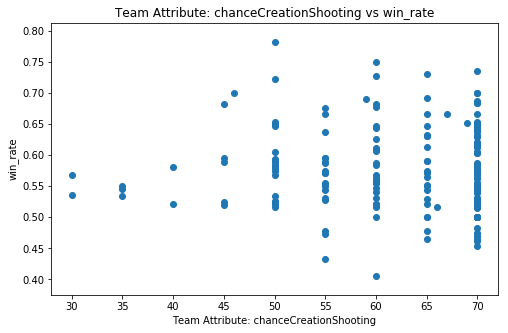

In [309]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2010['chanceCreationShooting'],merge_team_att_result_2010['win_rate'])
plt.title('Team Attribute: chanceCreationShooting vs win_rate')
plt.xlabel('Team Attribute: chanceCreationShooting')
plt.ylabel('win_rate')

In [310]:
#2011
result_table = pd.DataFrame(match_team_result(year_2011))
result_table_year_2011 = result_table[['team_long_name', 'win_count','loss_count','draw_count','total_count','win_rate']]
print('Team_Match_result table for 2011')
result_table_year_2011.head()

merge_team_att_result_2011 = pd.merge(result_table_year_2011,team_att_name_2011 ,on=['team_long_name'])
merge_team_att_result_2011

Team_Match_result table for 2011


,team_long_name,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,KRC Genk,10,3,7,20,0.675000,2011,66,52,65,66,51,48,47,54
1,KAA Gent,10,7,5,22,0.568182,2011,55,55,54,74,56,61,39,38
2,Sporting Lokeren,6,5,11,22,0.522727,2011,66,53,48,46,52,48,58,55
3,KV Kortrijk,9,4,7,20,0.625000,2011,38,65,38,69,52,34,57,47
4,KV Mechelen,7,3,7,17,0.617647,2011,67,57,47,47,52,48,61,48
5,Club Brugge KV,12,7,4,23,0.608696,2011,67,47,68,49,53,57,44,47
6,RSC Anderlecht,13,7,7,27,0.611111,2011,50,52,70,50,60,70,50,70
7,Sint-Truidense VV,2,1,10,13,0.538462,2011,53,53,48,52,53,46,46,46
8,SV Zulte-Waregem,6,0,12,18,0.666667,2011,52,52,52,48,53,46,48,53
9,Standard de Liège,10,4,9,23,0.630435,2011,68,66,53,66,63,59,47,66


In [311]:
# Do a pearson correlation analysis on the numerical columns
merge_team_att_result_2011.corr()

,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
win_count,1.000000,0.588037,-0.332185,0.732159,0.369282,NaN,0.121723,-0.136734,0.156791,0.067993,0.277089,0.238880,0.073269,0.156044
loss_count,0.588037,1.000000,-0.248440,0.750148,-0.496713,NaN,0.084278,-0.105749,0.098074,0.085388,0.215527,0.259742,0.141043,0.098015
draw_count,-0.332185,-0.248440,1.000000,0.252867,-0.193156,NaN,0.070413,0.012765,-0.063600,0.174412,-0.051402,-0.106090,-0.019962,0.082883
total_count,0.732159,0.750148,0.252867,1.000000,-0.154108,NaN,0.161292,-0.132960,0.111157,0.190293,0.255046,0.223111,0.108771,0.197038
win_rate,0.369282,-0.496713,-0.193156,-0.154108,1.000000,NaN,0.030077,-0.024968,0.054903,-0.041961,0.019638,-0.051419,-0.069849,0.015781
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlaySpeed,0.121723,0.084278,0.070413,0.161292,0.030077,NaN,1.000000,0.061883,0.190261,0.161904,0.202710,0.181712,0.087578,-0.085095
buildUpPlayPassing,-0.136734,-0.105749,0.012765,-0.132960,-0.024968,NaN,0.061883,1.000000,0.000093,0.141321,-0.110092,-0.159291,0.128476,-0.002294
chanceCreationPassing,0.156791,0.098074,-0.063600,0.111157,0.054903,NaN,0.190261,0.000093,1.000000,0.119164,0.221490,0.356877,-0.085288,0.060901
chanceCreationCrossing,0.067993,0.085388,0.174412,0.190293,-0.041961,NaN,0.161904,0.141321,0.119164,1.000000,0.113467,0.004912,0.120528,0.072405


In year 2011, chanceCreationPassing,buildUpPlaySpeed,chanceCreationShooting are the three attribute most correlated with performance.
 Here we explore chanceCreationPassing,buildUpPlaySpeed,chanceCreationShooting using a scatter plot to visualize the correlation of chanceCreationPassing,buildUpPlaySpeed,chanceCreationShooting vs win rate  

Text(0,0.5,'win_rate')

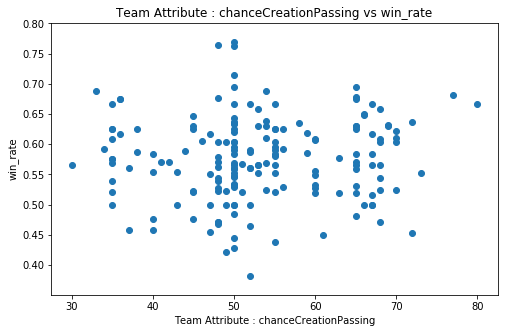

In [320]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2011['chanceCreationPassing'],merge_team_att_result_2011['win_rate'])
plt.title('Team Attribute : chanceCreationPassing vs win_rate')
plt.xlabel('Team Attribute : chanceCreationPassing')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

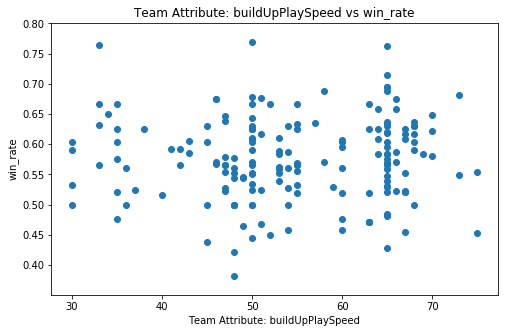

In [313]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2011['buildUpPlaySpeed'],merge_team_att_result_2011['win_rate'])
plt.title('Team Attribute: buildUpPlaySpeed vs win_rate')
plt.xlabel('Team Attribute: buildUpPlaySpeed')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

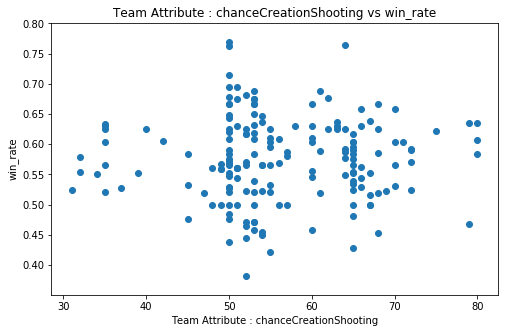

In [314]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2011['chanceCreationShooting'],merge_team_att_result_2011['win_rate'])
plt.title('Team Attribute : chanceCreationShooting vs win_rate')
plt.xlabel('Team Attribute : chanceCreationShooting')
plt.ylabel('win_rate')

In [201]:
#2012
result_table = pd.DataFrame(match_team_result(year_2012))
result_table_year_2012 = result_table[['team_long_name', 'win_count','loss_count','draw_count','total_count','win_rate']]
print('Team_Match_result table for 2012')
result_table_year_2012.head()

merge_team_att_result_2012 = pd.merge(result_table_year_2012,team_att_name_2012 ,on=['team_long_name'])
merge_team_att_result_2012

Team_Match_result table for 2012


,team_long_name,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,KV Kortrijk,7,4,6,17,0.588235,2012,31,47,37,67,50,46,45,52
1,Beerschot AC,4,2,5,11,0.590909,2012,55,55,47,46,49,45,46,50
2,RAEC Mons,6,7,5,18,0.472222,2012,50,50,55,48,46,46,45,47
3,Standard de Liège,9,6,5,20,0.575000,2012,75,70,55,58,60,45,60,52
4,KV Mechelen,7,5,5,17,0.558824,2012,52,54,47,53,50,52,60,48
5,Club Brugge KV,8,7,9,24,0.520833,2012,64,54,48,61,47,60,50,52
6,KAA Gent,5,3,10,18,0.555556,2012,50,47,55,66,47,48,45,52
7,KRC Genk,10,5,10,25,0.600000,2012,53,55,55,48,56,47,45,55
8,SV Zulte-Waregem,8,11,6,25,0.440000,2012,54,51,47,52,50,44,55,53
9,Sporting Lokeren,5,9,9,23,0.413043,2012,67,52,51,50,50,45,52,52


In [217]:
# Do a pearson correlation analysis on the numerical columns
merge_team_att_result_2012.corr()

,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
win_count,1.000000,0.606238,-0.249298,0.819235,0.371236,NaN,-0.120651,-0.136857,0.053679,-0.115073,0.028659,0.113335,0.094846,0.044107
loss_count,0.606238,1.000000,-0.359636,0.731782,-0.481137,NaN,-0.160321,-0.284255,0.037404,-0.177470,-0.001190,0.181273,0.190178,0.053553
draw_count,-0.249298,-0.359636,1.000000,0.176338,0.012249,NaN,0.091817,0.155651,-0.073935,0.047485,-0.065161,-0.139704,-0.005969,-0.042826
total_count,0.819235,0.731782,0.176338,1.000000,-0.025875,NaN,-0.113858,-0.157867,0.014712,-0.143121,-0.017228,0.095512,0.159396,0.033985
win_rate,0.371236,-0.481137,0.012249,-0.025875,1.000000,NaN,0.070089,0.179136,0.022059,0.086386,0.036567,-0.052262,-0.148889,-0.009775
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlaySpeed,-0.120651,-0.160321,0.091817,-0.113858,0.070089,NaN,1.000000,0.614188,0.186922,0.065349,0.197729,-0.106241,-0.068840,-0.100065
buildUpPlayPassing,-0.136857,-0.284255,0.155651,-0.157867,0.179136,NaN,0.614188,1.000000,-0.006475,0.136912,0.104527,-0.296301,-0.191438,-0.128379
chanceCreationPassing,0.053679,0.037404,-0.073935,0.014712,0.022059,NaN,0.186922,-0.006475,1.000000,-0.045020,0.160921,0.017376,0.023143,-0.061269
chanceCreationCrossing,-0.115073,-0.177470,0.047485,-0.143121,0.086386,NaN,0.065349,0.136912,-0.045020,1.000000,-0.012004,0.104531,0.088431,0.132882


In year 2012, buildUpPlayPassing,chanceCreationCrossing, buildUpPlaySpeed are the three attribute most correlated with performance.
 Here we explore buildUpPlayPassing,chanceCreationCrossing, buildUpPlaySpeed using a scatter plot to visualize the correlation of buildUpPlayPassing,chanceCreationCrossing, buildUpPlaySpeed vs win rate

Text(0,0.5,'win_rate')

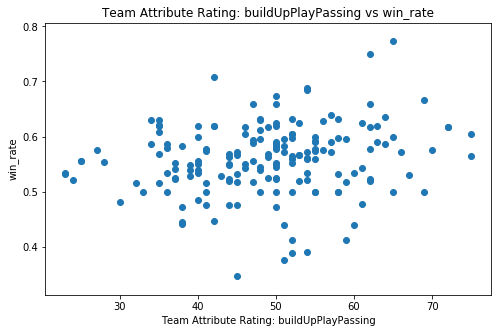

In [222]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2012['buildUpPlayPassing'],merge_team_att_result_2012['win_rate'])
plt.title('Team Attribute Rating: buildUpPlayPassing vs win_rate')
plt.xlabel('Team Attribute Rating: buildUpPlayPassing')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

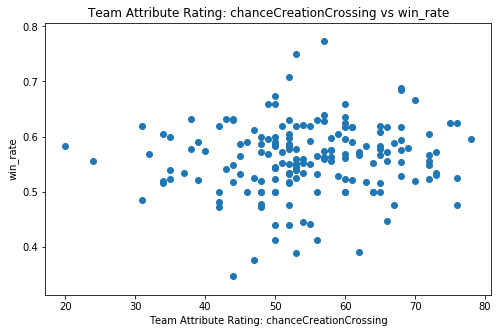

In [219]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2012['chanceCreationCrossing'],merge_team_att_result_2012['win_rate'])
plt.title('Team Attribute Rating: chanceCreationCrossing vs win_rate')
plt.xlabel('Team Attribute Rating: chanceCreationCrossing')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

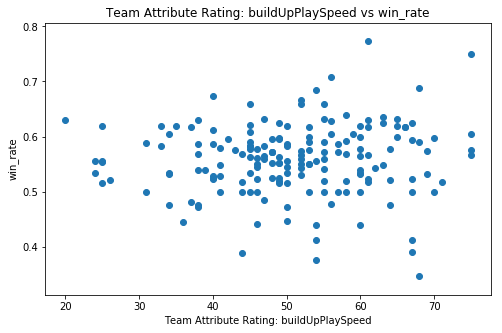

In [211]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2012['buildUpPlaySpeed'],merge_team_att_result_2012['win_rate'])
plt.title('Team Attribute Rating: buildUpPlaySpeed vs win_rate')
plt.xlabel('Team Attribute Rating: buildUpPlaySpeed')
plt.ylabel('win_rate')

In [203]:
#2013
result_table = pd.DataFrame(match_team_result(year_2013))
result_table_year_2013 = result_table[['team_long_name', 'win_count','loss_count','draw_count','total_count','win_rate']]
print('Team_Match_result table for 2013')
result_table_year_2013.head()

merge_team_att_result_2013 = pd.merge(result_table_year_2013,team_att_name_2013 ,on=['team_long_name'])
merge_team_att_result_2013

Team_Match_result table for 2013


,team_long_name,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,Waasland-Beveren,1,0,1,2,0.750000,2013,62,53,50,30,54,30,49,35
1,KAA Gent,2,1,1,4,0.625000,2013,50,37,28,66,34,50,53,40
2,Lierse SK,2,0,0,2,1.000000,2013,69,58,56,52,61,38,49,65
3,Arsenal,13,11,7,31,0.532258,2013,30,29,41,55,39,64,54,52
4,Chelsea,15,10,7,32,0.578125,2013,46,41,46,61,63,42,43,46
5,Crystal Palace,8,5,6,19,0.578947,2013,52,47,69,66,47,36,33,53
6,Liverpool,16,10,6,32,0.593750,2013,39,44,42,34,54,59,52,61
7,Manchester City,17,10,5,32,0.609375,2013,36,34,39,44,38,42,44,54
8,Norwich City,6,2,9,17,0.617647,2013,70,70,56,67,48,40,43,53
9,Sunderland,5,5,8,18,0.500000,2013,57,66,56,31,72,47,52,49


In [224]:
# Do a pearson correlation analysis on the numerical columns
merge_team_att_result_2013.corr()

,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
win_count,1.000000,0.728657,-0.195856,0.829269,0.046758,NaN,-0.097046,-0.137050,0.038585,0.121236,-0.049614,0.304040,0.195645,0.145247
loss_count,0.728657,1.000000,-0.211464,0.811338,-0.531713,NaN,-0.135648,-0.094902,0.004871,0.041105,0.008617,0.262641,0.142642,0.115031
draw_count,-0.195856,-0.211464,1.000000,0.265691,-0.219477,NaN,-0.047138,-0.035939,0.037272,-0.014322,0.027668,-0.177356,-0.123972,-0.123412
total_count,0.829269,0.811338,0.265691,1.000000,-0.352300,NaN,-0.145599,-0.141359,0.041692,0.080888,-0.009568,0.216419,0.121017,0.079404
win_rate,0.046758,-0.531713,-0.219477,-0.352300,1.000000,NaN,0.172000,0.038476,0.023705,0.036026,-0.044467,-0.047252,0.033562,0.024024
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlaySpeed,-0.097046,-0.135648,-0.047138,-0.145599,0.172000,NaN,1.000000,0.436644,0.332985,0.069389,0.078736,-0.237688,-0.013347,-0.065486
buildUpPlayPassing,-0.137050,-0.094902,-0.035939,-0.141359,0.038476,NaN,0.436644,1.000000,0.161498,0.086134,0.036876,-0.314547,-0.155605,-0.024931
chanceCreationPassing,0.038585,0.004871,0.037272,0.041692,0.023705,NaN,0.332985,0.161498,1.000000,0.149173,0.267571,0.026112,0.087451,0.013071
chanceCreationCrossing,0.121236,0.041105,-0.014322,0.080888,0.036026,NaN,0.069389,0.086134,0.149173,1.000000,0.072118,0.096730,0.056943,0.157270


In year 2013, buildUpPlaySpeed, buildUpPlayPassing , chanceCreationCrossing are the three attribute most correlated with performance.
 Here we explore buildUpPlaySpeed, buildUpPlayPassing , chanceCreationCrossing using a scatter plot to visualize the correlation of buildUpPlaySpeed, buildUpPlayPassing , chanceCreationCrossing vs win rate

Text(0,0.5,'win_rate')

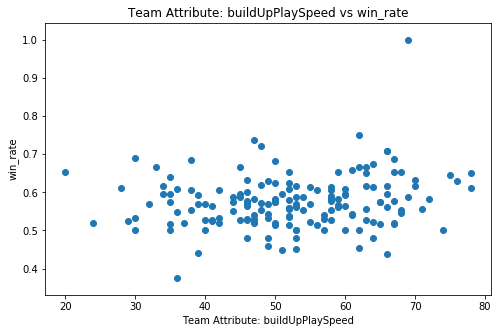

In [225]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2013['buildUpPlaySpeed'],merge_team_att_result_2013['win_rate'])
plt.title('Team Attribute: buildUpPlaySpeed vs win_rate')
plt.xlabel('Team Attribute: buildUpPlaySpeed')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

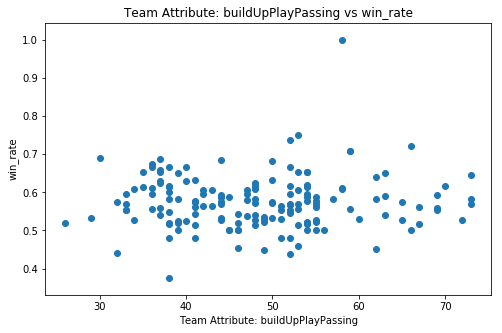

In [226]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2013['buildUpPlayPassing'],merge_team_att_result_2013['win_rate'])
plt.title('Team Attribute: buildUpPlayPassing vs win_rate')
plt.xlabel('Team Attribute: buildUpPlayPassing')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

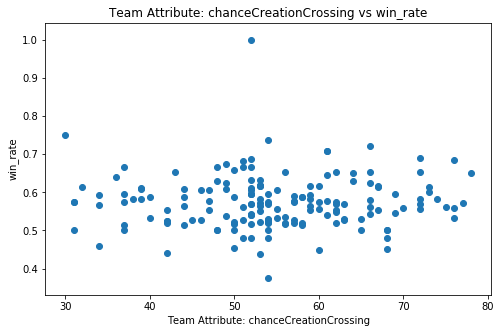

In [228]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2013['chanceCreationCrossing'],merge_team_att_result_2013['win_rate'])
plt.title('Team Attribute: chanceCreationCrossing vs win_rate')
plt.xlabel('Team Attribute: chanceCreationCrossing')
plt.ylabel('win_rate')

In [205]:
#2014
result_table = pd.DataFrame(match_team_result(year_2014))
result_table_year_2014 = result_table[['team_long_name', 'win_count','loss_count','draw_count','total_count','win_rate']]
print('Team_Match_result table for 2014')
result_table_year_2014.head()

merge_team_att_result_2014 = pd.merge(result_table_year_2014,team_att_name_2014 ,on=['team_long_name'])
merge_team_att_result_2014

Team_Match_result table for 2014


,team_long_name,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,Standard de Liège,8,8,5,21,0.500000,2014,54,62,55,58,60,45,54,52
1,Waasland-Beveren,5,2,5,12,0.625000,2014,38,39,29,30,39,25,37,35
2,KSV Cercle Brugge,4,2,6,12,0.583333,2014,53,43,52,58,42,59,47,62
3,Lierse SK,3,2,7,12,0.541667,2014,69,58,56,52,61,38,49,65
4,KV Mechelen,7,3,11,21,0.595238,2014,52,40,47,53,50,42,51,52
5,RSC Anderlecht,8,8,9,25,0.500000,2014,52,51,60,53,47,60,50,65
6,SV Zulte-Waregem,4,4,7,15,0.500000,2014,54,51,47,52,32,44,58,37
7,Club Brugge KV,10,7,10,27,0.555556,2014,42,45,42,57,47,51,50,57
8,Sporting Charleroi,8,6,7,21,0.547619,2014,60,53,48,50,48,42,48,49
9,Sporting Lokeren,7,3,12,22,0.590909,2014,62,52,42,50,62,45,52,52


In [206]:
# Do a pearson correlation analysis on the numerical columns
merge_team_att_result_2014.corr()

,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
win_count,1.000000,0.701318,-0.312266,0.811537,0.307407,NaN,-0.174694,-0.215313,-0.026463,0.110056,0.131354,0.206826,0.097784,0.068616
loss_count,0.701318,1.000000,-0.367339,0.759366,-0.431780,NaN,-0.061570,-0.084254,-0.078121,0.099954,0.092151,0.181694,0.177419,0.101724
draw_count,-0.312266,-0.367339,1.000000,0.172879,-0.041630,NaN,0.055171,0.003252,0.098765,0.013326,0.113799,-0.155883,-0.118792,0.029456
total_count,0.811537,0.759366,0.172879,1.000000,-0.068356,NaN,-0.108631,-0.174702,-0.002770,0.128311,0.193434,0.136363,0.088423,0.113060
win_rate,0.307407,-0.431780,-0.041630,-0.068356,1.000000,NaN,-0.101558,-0.167057,0.061581,-0.019601,-0.020941,0.022996,-0.097492,-0.029738
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlaySpeed,-0.174694,-0.061570,0.055171,-0.108631,-0.101558,NaN,1.000000,0.422232,0.215649,0.166828,0.162976,-0.201242,-0.008943,-0.043989
buildUpPlayPassing,-0.215313,-0.084254,0.003252,-0.174702,-0.167057,NaN,0.422232,1.000000,0.271868,0.269996,-0.028193,-0.214919,-0.166561,-0.076839
chanceCreationPassing,-0.026463,-0.078121,0.098765,-0.002770,0.061581,NaN,0.215649,0.271868,1.000000,0.334323,0.160320,0.016291,-0.007213,0.019990
chanceCreationCrossing,0.110056,0.099954,0.013326,0.128311,-0.019601,NaN,0.166828,0.269996,0.334323,1.000000,-0.025378,-0.021201,-0.061921,0.153353


In year 2014, chanceCreationPassing,defencePressure are the three attribute most correlated with performance.
 Here we explore chanceCreationPassing,defencePressureusing a scatter plot to visualize the correlation of chanceCreationPassing,defencePressure vs win rate

Text(0,0.5,'win_rate')

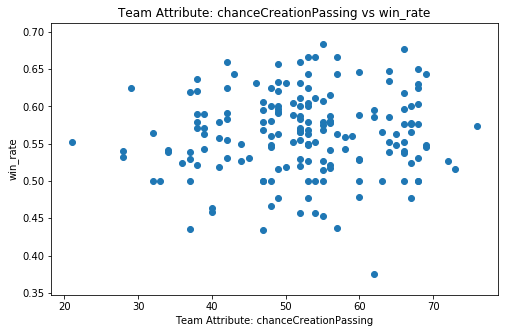

In [229]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2014['chanceCreationPassing'],merge_team_att_result_2014['win_rate'])
plt.title('Team Attribute: chanceCreationPassing vs win_rate')
plt.xlabel('Team Attribute: chanceCreationPassing')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

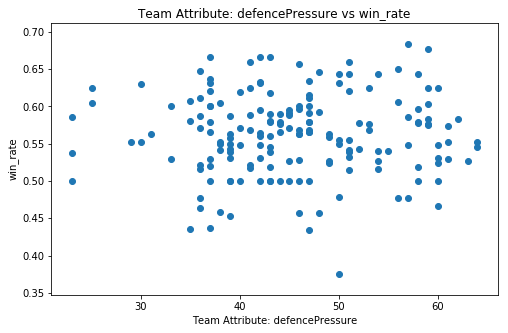

In [230]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2014['defencePressure'],merge_team_att_result_2014['win_rate'])
plt.title('Team Attribute: defencePressure vs win_rate')
plt.xlabel('Team Attribute: defencePressure')
plt.ylabel('win_rate')

In [207]:
#2015
result_table = pd.DataFrame(match_team_result(year_2015))
result_table_year_2015 = result_table[['team_long_name', 'win_count','loss_count','draw_count','total_count','win_rate']]
print('Team_Match_result table for 2015')
result_table_year_2015.head()

merge_team_att_result_2015 = pd.merge(result_table_year_2015,team_att_name_2015 ,on=['team_long_name'])
merge_team_att_result_2015

Team_Match_result table for 2015


,team_long_name,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,KV Kortrijk,8,2,9,19,0.657895,2015,42,47,37,67,30,46,45,52
1,KRC Genk,11,3,6,20,0.700000,2015,58,38,30,69,56,36,57,70
2,KV Oostende,10,4,7,21,0.642857,2015,52,54,45,42,53,42,47,44
3,SV Zulte-Waregem,7,5,7,19,0.552632,2015,54,51,47,52,32,44,58,37
4,KVC Westerlo,5,2,9,16,0.593750,2015,52,50,57,55,32,48,45,53
5,RSC Anderlecht,10,5,10,25,0.600000,2015,52,51,60,53,47,53,50,61
6,Sporting Charleroi,5,5,9,19,0.500000,2015,60,53,48,50,48,39,48,49
7,KAA Gent,10,7,9,26,0.557692,2015,50,37,42,66,34,49,54,52
8,Club Brugge KV,14,7,1,22,0.659091,2015,42,45,42,57,47,51,50,57
9,Standard de Liège,8,4,5,17,0.617647,2015,54,62,55,58,60,45,54,52


In [208]:
# Do a pearson correlation analysis on the numerical columns
merge_team_att_result_2015.corr()

,win_count,loss_count,draw_count,total_count,win_rate,year,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
win_count,1.000000,0.610566,-0.459748,0.744873,0.457282,NaN,0.003057,-0.183796,0.093173,0.095201,0.018440,0.333589,0.330916,0.117686
loss_count,0.610566,1.000000,-0.301036,0.798386,-0.408382,NaN,0.080252,-0.150628,0.077746,0.098175,0.024585,0.340285,0.308097,0.119595
draw_count,-0.459748,-0.301036,1.000000,0.096368,-0.255205,NaN,0.005064,-0.029657,-0.137973,-0.108503,0.014137,-0.087950,-0.164930,-0.002818
total_count,0.744873,0.798386,0.096368,1.000000,-0.074453,NaN,0.050363,-0.223844,0.026888,0.056627,0.034196,0.363199,0.299244,0.143984
win_rate,0.457282,-0.408382,-0.255205,-0.074453,1.000000,NaN,-0.069276,-0.035459,0.024003,-0.001599,-0.012957,0.008860,0.033255,0.002667
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buildUpPlaySpeed,0.003057,0.080252,0.005064,0.050363,-0.069276,NaN,1.000000,0.273293,0.330998,0.188321,0.126335,-0.185589,0.135669,-0.099099
buildUpPlayPassing,-0.183796,-0.150628,-0.029657,-0.223844,-0.035459,NaN,0.273293,1.000000,0.237226,0.262983,-0.027825,-0.218243,-0.072560,-0.115216
chanceCreationPassing,0.093173,0.077746,-0.137973,0.026888,0.024003,NaN,0.330998,0.237226,1.000000,0.262745,0.199312,0.052115,0.084836,-0.053179
chanceCreationCrossing,0.095201,0.098175,-0.108503,0.056627,-0.001599,NaN,0.188321,0.262983,0.262745,1.000000,-0.067047,0.007045,0.006143,0.112345


In year 2015, defenceAggression,chanceCreationPassing,defencePressureare the three attribute most correlated with performance.
 Here we explore defenceAggression,chanceCreationPassing,defencePressure a scatter plot to visualize the correlation of defenceAggression,chanceCreationPassing,defencePressure vs win rate

Text(0,0.5,'win_rate')

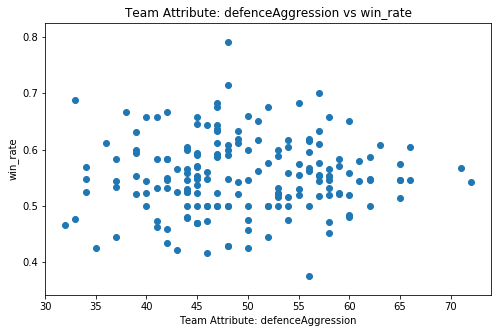

In [231]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2015['defenceAggression'],merge_team_att_result_2015['win_rate'])
plt.title('Team Attribute: defenceAggression vs win_rate')
plt.xlabel('Team Attribute: defenceAggression')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

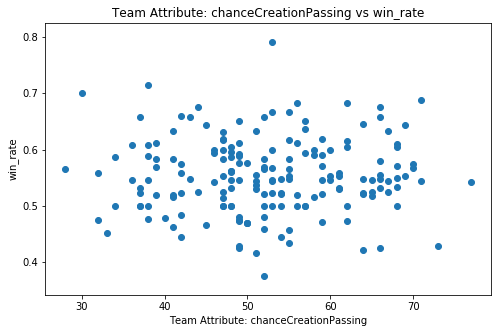

In [232]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2015['chanceCreationPassing'],merge_team_att_result_2015['win_rate'])
plt.title('Team Attribute: chanceCreationPassing vs win_rate')
plt.xlabel('Team Attribute: chanceCreationPassing')
plt.ylabel('win_rate')

Text(0,0.5,'win_rate')

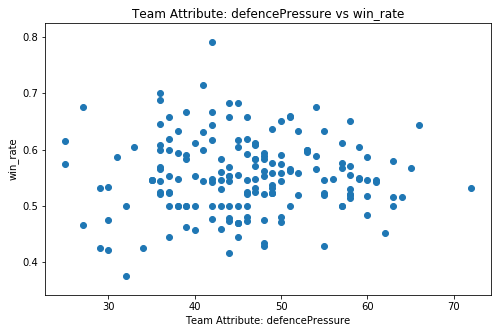

In [233]:
plt.subplots(figsize=(8, 5))
plt.scatter(merge_team_att_result_2015['defencePressure'],merge_team_att_result_2015['win_rate'])
plt.title('Team Attribute: defencePressure vs win_rate')
plt.xlabel('Team Attribute: defencePressure')
plt.ylabel('win_rate')

<a id='conclusions'></a>
## Conclusions


#### Research Question 1: What teams improved the most over the time period?


>  Team Sevilla FC has the max improvement 0.273810 

#### Research Question 2 - Which players had the most penalties?

>  Rickie Lambert with the most penalties 96 

####  Research Question 3 - What team attributes lead to the most victories?

Below listed top three different team attributes correlate most with win rate by year.

*2010:chanceCreationShooting
*2011:chanceCreationPassing, buildUpPlaySpeed, chanceCreationShooting
*2012:buildUpPlayPassing, chanceCreationCrossing, buildUpPlaySpeed
*2013:buildUpPlaySpeed, buildUpPlayPassing , chanceCreationCrossing
*2014:chanceCreationPassing,defencePressure
*2015:defenceAggression,chanceCreationPassing,defencePressure

ChanceCreationPassing and buildUpPlaySpeed these two attributes showed up the most.(three times among 2010~2015)
I conclude that ChanceCreationPassing and buildUpPlaySpeed of the team have higher correlation with the win rate.
